# Visualizing Earnings Based On College Majors

In this guided project we will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by the [American Community Survey](https://www.census.gov/programs-surveys/acs/). FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. You can find a detailed explanation of each row in the readme file.

In this project, we will try to answer and visualize the following questions:

- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

First, let's read in the dataset and do some basic data cleaning.

## Data cleaning

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

from pandas.plotting import scatter_matrix

In [120]:
#let's read in the dataset

recent_grads = pd.read_csv('recent-grads.csv')

#First line
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [121]:
#Let's see the first five rows

recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [122]:
#And the last five rows

recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [123]:
recent_grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ENGINEERING AND INDUSTRIAL MANAGEMENT,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [124]:
#number of rows

row_data_count = recent_grads.shape[0]
row_data_count

173

In [125]:
#Let's drop rows containing missing values

recent_grads = recent_grads.dropna(axis=0)

In [126]:
#The number of rows after the clean up

cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

In the above few cells we opened the dataset. We found out that there was one row containing null values and decided to drop it. The dataset now consists of 172 rows. Let's move on to visualization.

## Visualizing the data using scatterplots

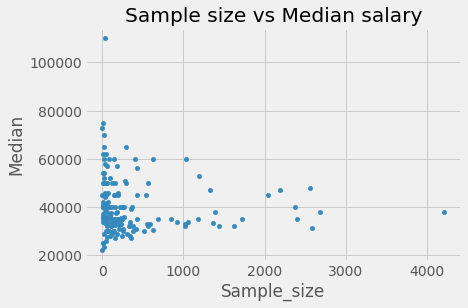

In [127]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample size vs Median salary')
plt.show()

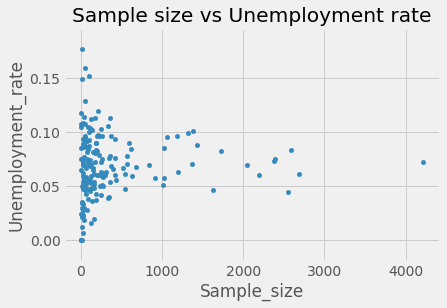

In [128]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample size vs Unemployment rate')
plt.show()

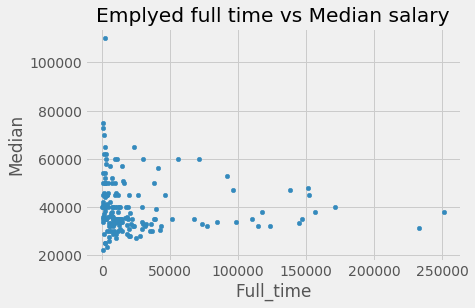

In [129]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Emplyed full time vs Median salary')
plt.show()

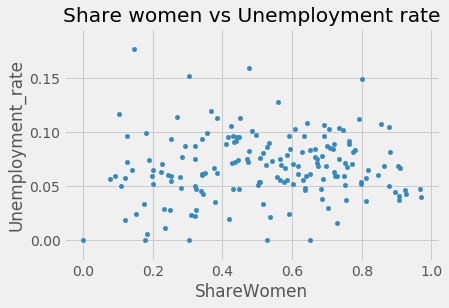

In [130]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share women vs Unemployment rate')
plt.show()

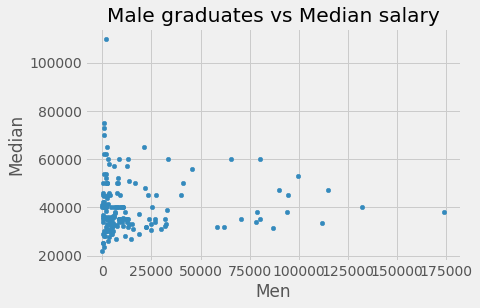

In [131]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Male graduates vs Median salary')
plt.show()

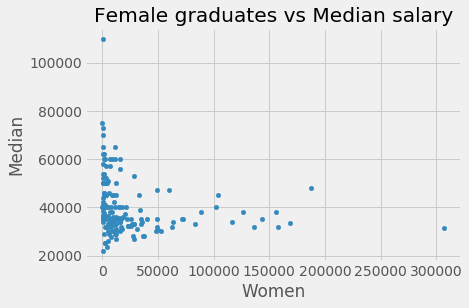

In [132]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Female graduates vs Median salary')
plt.show()

No direct corelation can be observed from the above scatterplots.


## Visualizing the data using histograms

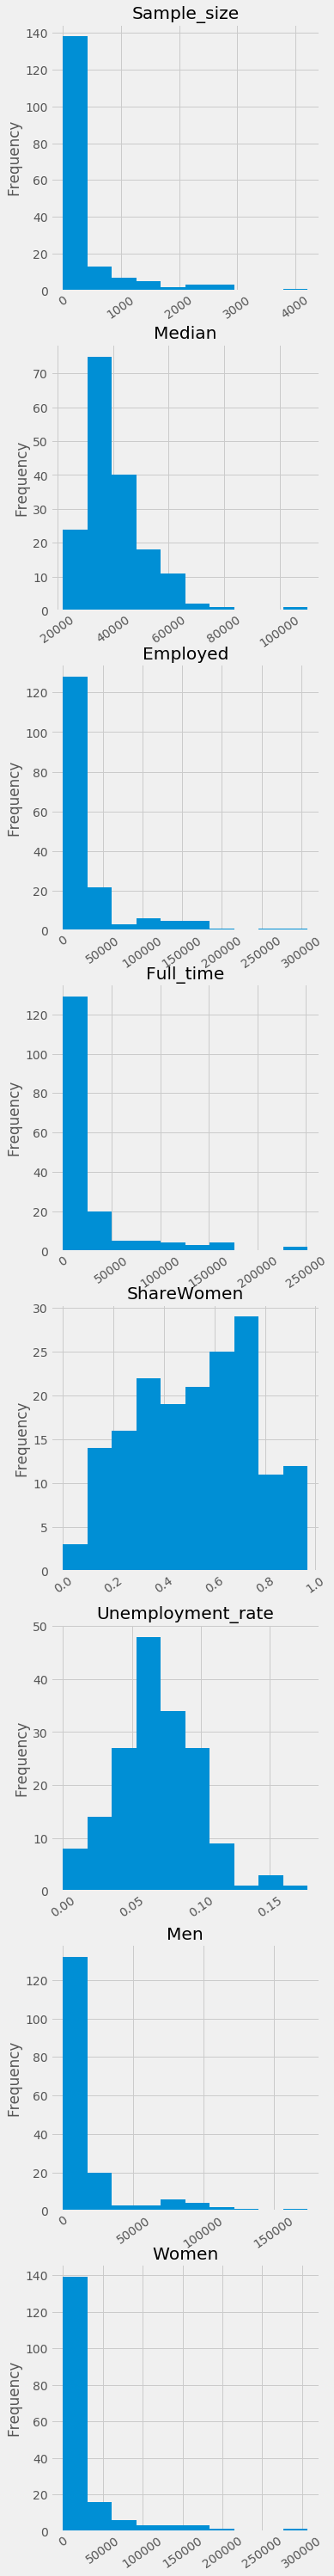

In [133]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

fig = plt.figure(figsize=(5,50))
for r in range(0,8):
    ax=fig.add_subplot(8,1,r+1)
    ax=recent_grads[cols[r]].plot(kind='hist', rot=35)
    ax.set_title('{}'.format(cols[r]))

- What percent of majors are predominantly* male? - About 44% of the majors are predominantly male. (check back up cells)
- Predominantly female? - Around 55% of the majors are predominantly female. (check back up cells)
- What's the most common median salary range? - The median salary range is 30000-40000.

______________________
*more than half of the total graduates.

## Visualizing the data using scatter matrixes

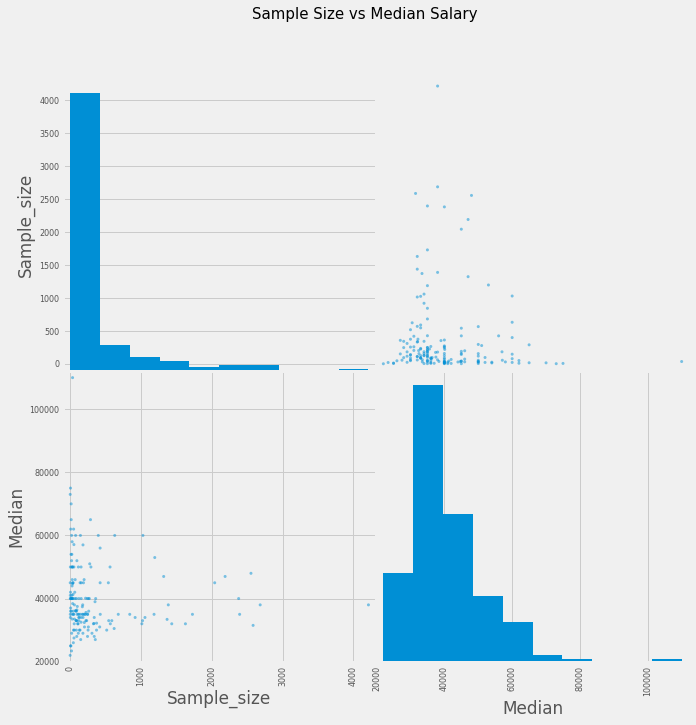

In [134]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))
plt.suptitle('Sample Size vs Median Salary', size=15)
plt.show()

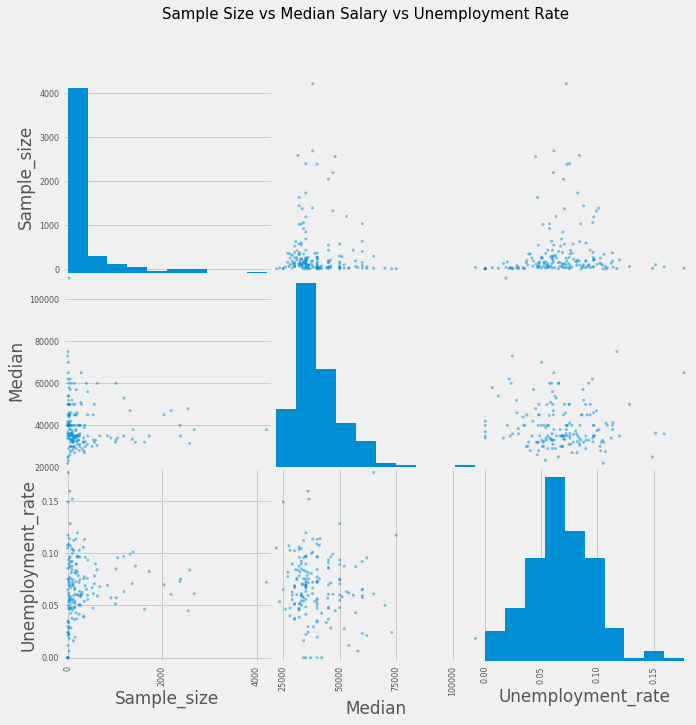

In [135]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))
plt.suptitle('Sample Size vs Median Salary vs Unemployment Rate', size=15)
plt.show()

## Share women in the top and bottom 10 Majors

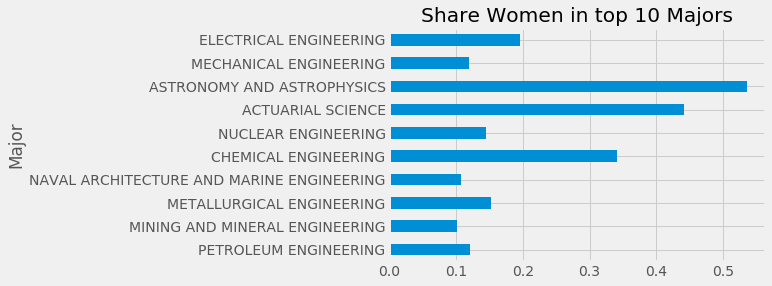

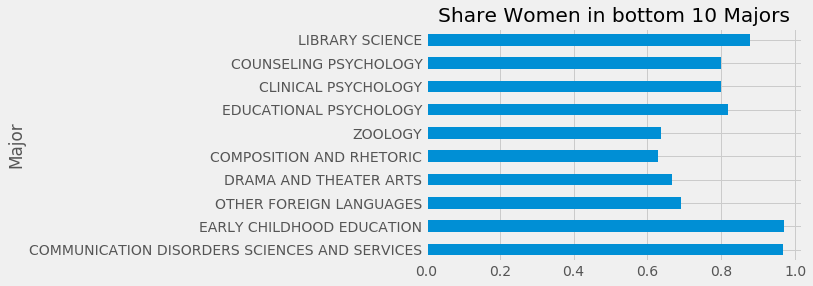

In [136]:
recent_grads.head(10).plot.barh(x='Major', y='ShareWomen', legend=False, title='Share Women in top 10 Majors')
recent_grads.tail(10).plot.barh(x='Major', y='ShareWomen', legend=False, title='Share Women in bottom 10 Majors')
plt.show()

Out of the top 10 majors, those with the highest share of women are:

- Astronomy and Astrophysics
- Actuarial science
- Chemical engineering

It seems that the less popular majors have a high share of female graduates.

## Unemployment rate of the top and bottom 10 majors

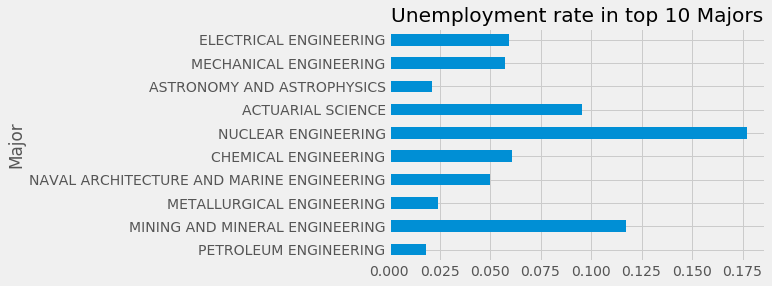

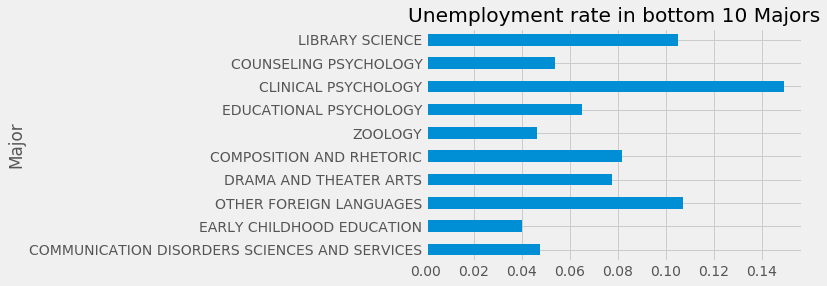

In [137]:
recent_grads.head(10).plot.barh(x='Major', y='Unemployment_rate', legend=False, title='Unemployment rate in top 10 Majors')
recent_grads.tail(10).plot.barh(x='Major', y='Unemployment_rate', legend=False, title='Unemployment rate in bottom 10 Majors')
plt.show()

10 most popular majors:

- highest unemployment rate - Nuclear Engineering
- lowest unemployment rate - Petrolium engineering

10 least popular majors:

- highest unemployment rate - Clinical psychology
- lowest unemployment rate - Early childhood education


## Number of Men vs Number of Women

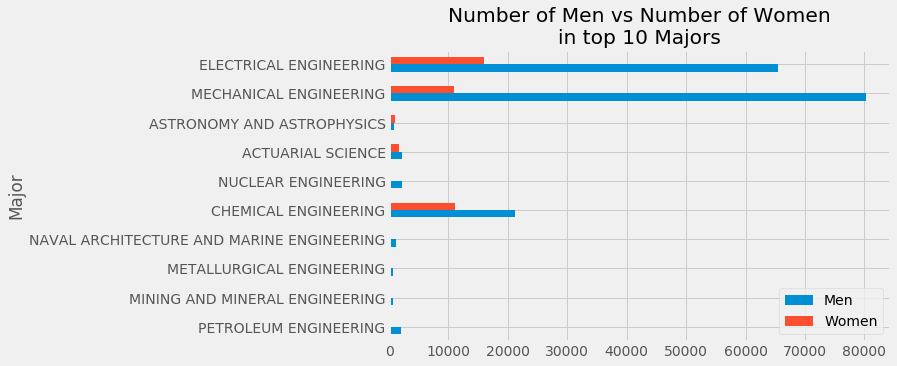

In [138]:
men_women = recent_grads[['Major', 'Men', 'Women']]
men_women.head(10).plot.barh(x='Major', figsize=(8,5))
plt.title('Number of Men vs Number of Women\nin top 10 Majors')
plt.show()

We can conclude that the most popular 10 majors are prefered by male students. We can also conclude that Engineering majors are predominantly male.

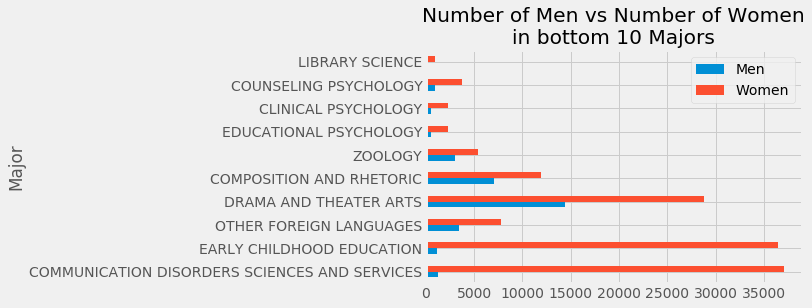

In [139]:
men_women.tail(10).plot.barh(x='Major')
plt.title('Number of Men vs Number of Women\nin bottom 10 Majors')
plt.show()

We can see that the graduates of the least popular majors are predominantly female.

## Using boxplots to explore Median salaries and Unemploment rate

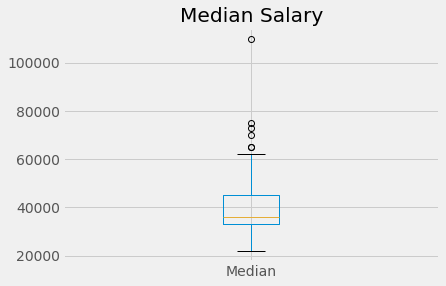

In [140]:
recent_grads['Median'].plot(kind='box')
plt.title('Median Salary')
plt.show()

Once again we confirm that the median salary is between 30000 and 40000.

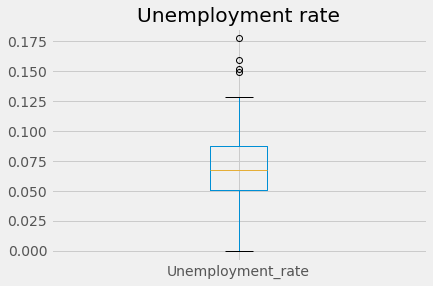

In [141]:
recent_grads['Unemployment_rate'].plot(kind='box')
plt.title('Unemployment rate')
plt.show()

The median unemployment rate is 0.06.

## Do students in more popular majors make more money?

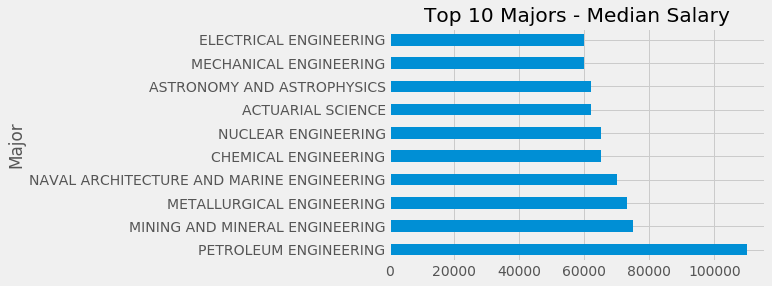

In [142]:
recent_grads.head(10).plot.barh(x='Major', y='Median', legend=False)
plt.title('Top 10 Majors - Median Salary')
plt.show()

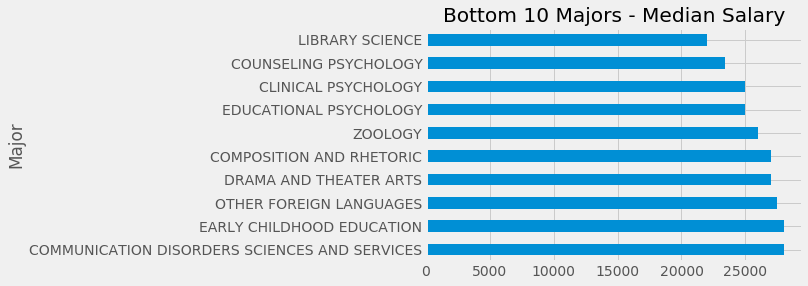

In [143]:
recent_grads.tail(10).plot.barh(x='Major', y='Median', legend=False)
plt.title('Bottom 10 Majors - Median Salary')
plt.show()

Yes, we can conclude that the median salary of graduates of the top 10 ranked majors is higher than the median salary of the bottom 10 majors.

## Which category of majors have the most students?

In [144]:
students_per_cat = {}
categories = recent_grads['Major_category'].unique()

for cat in categories:
    by_cat = recent_grads[recent_grads['Major_category'] == cat]
    total = by_cat['Total'].sum()
    students_per_cat[cat] = total
    
students_per_cat

{'Engineering': 537583.0,
 'Business': 1302376.0,
 'Physical Sciences': 185479.0,
 'Law & Public Policy': 179107.0,
 'Computers & Mathematics': 299008.0,
 'Industrial Arts & Consumer Services': 229792.0,
 'Arts': 357130.0,
 'Health': 463230.0,
 'Social Science': 529966.0,
 'Biology & Life Science': 453862.0,
 'Education': 559129.0,
 'Agriculture & Natural Resources': 75620.0,
 'Humanities & Liberal Arts': 713468.0,
 'Psychology & Social Work': 481007.0,
 'Communications & Journalism': 392601.0,
 'Interdisciplinary': 12296.0}

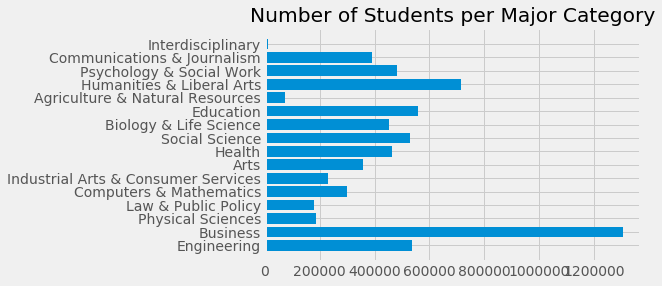

In [145]:
plt.barh(range(len(students_per_cat)), list(students_per_cat.values()), align='center')
plt.yticks(range(len(students_per_cat)), list(students_per_cat.keys()))
plt.title('Number of Students per Major Category')
plt.show()

The top five Categories of majors based on total number of students are:

- Business
- Humanities &amp; Liberal Arts
- Education
- Engineering
- Social science
- Psychology &amp; Social Work


## Back up cells

In [146]:
#Calculating the number of Majors where over half of the total graduates are male
male = recent_grads[recent_grads['Men'] > (recent_grads['Total']/2)]
male.shape

(76, 21)

In [147]:
#Calculating the number of Majors where over half of the total graduates are female
female = recent_grads[recent_grads['Women'] > (recent_grads['Total']/2)]
female.shape

(96, 21)